In [3]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt 
from IPython import display
from pylab import *
import ipykernel 
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline
pd.set_option('display.max_columns',None)
from sklearn.preprocessing import LabelEncoder
import folium
import pandas as pd
import seaborn as sns


In [4]:
data = pd.read_csv('D:/CDF_Project/events_data.csv',encoding="Latin-1")
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [5]:
data1 = pd.read_csv('D:/CDF_Project/gender_age_train_new.csv',encoding="Latin-1")
data1.head()

,device_id,gender,age,group
0,5.702164e+17,M,35,M32-38
1,-2.897160e+18,M,35,M32-38
2,2.847301e+18,M,35,M32-38
3,8.837096e+18,M,30,M29-31
4,2.046329e+18,M,30,M29-31


In [6]:
data2 = pd.read_csv('D:/CDF_Project/phone_device_brand_model_new.csv',encoding="Latin-1")
data2.head()

,device_id,phone_brand,device_model
0,1.877780e+18,vivo,Y13
1,-3.766090e+18,Xiaomi,V183
2,-6.238940e+18,OPPO,R7s
3,8.973200e+18,Samsung,A368t
4,-2.015530e+18,Xiaomi,çº¢ç±³Note2


In [5]:
print(data.isnull().sum())

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64


### Remove Nan value in lat & long

In [8]:
data_clean = data.dropna(subset=['latitude','longitude','device_id','state'])

In [9]:
data.dropna(inplace=True)

In [10]:
print(data_clean.isnull().sum())

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64


In [11]:
data_clean.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [12]:
delhi_data = data_clean[data['state'] == 'Delhi']
print(delhi_data)

         event_id     device_id            timestamp  longitude   latitude  \
0         2765368  2.973348e+18  2016-05-07 22:52:05  77.225676  28.730140   
2          605968 -3.264500e+18  2016-05-02 14:23:04  77.256809  28.757906   
8         2309828  3.020769e+18  2016-05-04 09:24:50  77.263922  28.757914   
13        2633127 -3.090167e+18  2016-05-05 04:42:59  77.285920  28.758381   
17        2224400  7.566051e+18  2016-05-01 00:07:47  77.240478  28.715664   
...           ...           ...                  ...        ...        ...   
3252936   1988815 -4.174134e+18  2016-05-03 06:38:48  77.272114  28.720270   
3252937   2597863  8.955594e+18  2016-05-03 20:59:46  77.230663  28.713440   
3252940   2903846  9.184964e+18  2016-05-06 09:34:14  77.306753  28.751234   
3252944   1808542 -6.541469e+18  2016-05-07 18:03:45  77.302444  28.744720   
3252947   1316227 -6.406040e+18  2016-05-01 16:03:28  77.235578  28.764065   

          city  state  
0        Delhi  Delhi  
2        Delhi 

### Merging device id using Inner Value 

In [13]:
merged_data = pd.merge(data_clean, data1, on='device_id', how='inner')
merged_data = pd.merge(merged_data, data2, on='device_id', how='inner')
print(merged_data)


         event_id     device_id            timestamp  longitude   latitude  \
0         2765368  2.973348e+18  2016-05-07 22:52:05  77.225676  28.730140   
1         1355198  2.973348e+18  2016-05-01 01:35:45  77.225676  28.730140   
2         1630972  2.973348e+18  2016-05-03 00:07:34  77.225676  28.730140   
3         2732453  2.973348e+18  2016-05-01 06:15:59  77.225676  28.730140   
4         1562542  2.973348e+18  2016-05-01 20:34:19  77.225676  28.730140   
...           ...           ...                  ...        ...        ...   
2187781   1418502  5.362779e+18  2016-05-04 07:54:17  87.991719  26.197011   
2187782   2610242 -4.918954e+17  2016-05-05 09:51:34  80.329394  13.154021   
2187783   3028147 -4.918954e+17  2016-05-04 14:12:04  80.329394  13.154021   
2187784   3181274 -3.479624e+18  2016-05-05 19:23:24  70.535382  21.817841   
2187785   1319153 -1.420493e+18  2016-05-06 18:03:54  72.880402  18.999495   

               city        state gender  age   group phone_bran

In [14]:
merged_data.describe()

,event_id,device_id,longitude,latitude,age
count,2.187786e+06,2.187786e+06,2.187786e+06,2.187786e+06,2.187786e+06
mean,1.626248e+06,1.281117e+17,7.793785e+01,2.168840e+01,3.247983e+01
std,9.389865e+05,5.455738e+18,3.869784e+00,5.898386e+00,1.085406e+01
min,1.000000e+00,-9.221066e+18,1.256700e+01,8.202743e+00,6.000000e+00
25%,8.132882e+05,-4.849435e+18,7.583845e+01,1.779553e+01,2.500000e+01
50%,1.626118e+06,2.066116e+17,7.726421e+01,2.113781e+01,3.000000e+01
75%,2.439430e+06,5.284039e+18,8.031174e+01,2.869214e+01,3.700000e+01
max,3.252950e+06,9.219842e+18,9.541030e+01,4.187190e+01,9.000000e+01


In [13]:
print(merged_data.isnull().sum())

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64


In [14]:
merged_data.shape


(2187786, 12)

### After Merging inner value_ state Wise- delhi( Null Value)

In [15]:
delhi_rows = merged_data.isnull().any(axis=1).sum()

print(f'Number of rows with any null values in delhi  : {delhi_rows }')

Number of rows with any null values in delhi  : 0


In [16]:
data.shape

(3251697, 7)

In [17]:
data1.shape

(52908, 4)

In [18]:
data2.shape

(65741, 3)

In [19]:
merged_data.shape

(2187786, 12)

In [20]:
print(data.isnull().sum())

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64


In [21]:
print(data1.isnull().sum())

device_id    0
gender       0
age          0
group        0
dtype: int64


In [22]:
print(data2.isnull().sum())

device_id       0
phone_brand     0
device_model    0
dtype: int64


In [23]:
print(merged_data.isnull().sum())

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64


In [24]:
merged_data['age'].value_counts()

age
29    127676
26    120992
27    112879
28    109342
24    104407
       ...  
6         96
10        91
89        79
11        52
86        19
Name: count, Length: 79, dtype: int64

In [25]:
merged_data['latitude'].value_counts()

latitude
13.128174    33405
13.114228    14555
18.616127     6718
28.749820     4136
28.688980     3950
             ...  
13.059620        1
32.723796        1
13.129086        1
13.039896        1
18.999495        1
Name: count, Length: 15433, dtype: int64

## merged_Outer Value 

In [41]:
data['device_id'] = data['device_id'].astype('float64')
data1['device_id'] = data1['device_id'].astype('float64')
data2['device_id'] =data2['device_id'].astype('float64')

In [42]:
merged_df = pd.merge(data, data1, on='device_id', how='outer')
merged_df = pd.merge(merged_df, data2, on='device_id', how='outer')
print(merged_df)

          event_id     device_id            timestamp  longitude  latitude  \
0        2765368.0  2.973348e+18  2016-05-07 22:52:05  77.225676  28.73014   
1        1355198.0  2.973348e+18  2016-05-01 01:35:45  77.225676  28.73014   
2        1630972.0  2.973348e+18  2016-05-03 00:07:34  77.225676  28.73014   
3        2732453.0  2.973348e+18  2016-05-01 06:15:59  77.225676  28.73014   
4        1562542.0  2.973348e+18  2016-05-01 20:34:19  77.225676  28.73014   
...            ...           ...                  ...        ...       ...   
3317416        NaN -5.175020e+18                  NaN        NaN       NaN   
3317417        NaN -2.127690e+18                  NaN        NaN       NaN   
3317418        NaN  8.855680e+18                  NaN        NaN       NaN   
3317419        NaN -1.242440e+18                  NaN        NaN       NaN   
3317420        NaN  1.174880e+18                  NaN        NaN       NaN   

          city  state gender   age   group phone_brand device_m

In [43]:
merged_df.shape

(3317421, 12)

In [44]:
merged_df

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,2765368.0,2.973348e+18,2016-05-07 22:52:05,77.225676,28.73014,Delhi,Delhi,M,30.0,M29-31,vivo,X5Max
1,1355198.0,2.973348e+18,2016-05-01 01:35:45,77.225676,28.73014,Delhi,Delhi,M,30.0,M29-31,vivo,X5Max
2,1630972.0,2.973348e+18,2016-05-03 00:07:34,77.225676,28.73014,Delhi,Delhi,M,30.0,M29-31,vivo,X5Max
3,2732453.0,2.973348e+18,2016-05-01 06:15:59,77.225676,28.73014,Delhi,Delhi,M,30.0,M29-31,vivo,X5Max
4,1562542.0,2.973348e+18,2016-05-01 20:34:19,77.225676,28.73014,Delhi,Delhi,M,30.0,M29-31,vivo,X5Max
...,...,...,...,...,...,...,...,...,...,...,...,...
3317416,NaN,-5.175020e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coolpad,7295C
3317417,NaN,-2.127690e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huawei,C8816D
3317418,NaN,8.855680e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung,W2014
3317419,NaN,-1.242440e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Xiaomi,çº¢ç±³2


In [45]:
merged_df.describe()

,event_id,device_id,longitude,latitude,age
count,3.251697e+06,3.317421e+06,3.251697e+06,3.251697e+06,2.225174e+06
mean,1.626476e+06,9.892639e+16,7.815874e+01,2.168849e+01,3.246240e+01
std,9.390402e+05,5.316282e+18,4.235633e+00,5.789200e+00,1.083891e+01
min,1.000000e+00,-9.223070e+18,1.256700e+01,8.190110e+00,1.000000e+00
25%,8.132460e+05,-4.539575e+18,7.583543e+01,1.780171e+01,2.500000e+01
50%,1.626452e+06,1.645424e+17,7.726814e+01,2.216454e+01,3.000000e+01
75%,2.439720e+06,4.855116e+18,8.031916e+01,2.868278e+01,3.700000e+01
max,3.252950e+06,9.222850e+18,9.545946e+01,4.187190e+01,9.000000e+01


In [48]:
print(merged_df.isnull().sum())

event_id          65724
device_id             0
timestamp         65724
longitude         65724
latitude          65724
city              65724
state             65724
gender          1092247
age             1092247
group           1092247
phone_brand     1079359
device_model    1079359
dtype: int64


In [49]:
# Replace NaN with None (null)
df = merged_df.replace({pd.NA: None, pd.NaT: None, float('nan'): None})

# OR simply for NaN (float NaN type):
df = merged_df.replace({float('nan'): None})

print(df)

          event_id     device_id            timestamp  longitude  latitude  \
0        2765368.0  2.973348e+18  2016-05-07 22:52:05  77.225676  28.73014   
1        1355198.0  2.973348e+18  2016-05-01 01:35:45  77.225676  28.73014   
2        1630972.0  2.973348e+18  2016-05-03 00:07:34  77.225676  28.73014   
3        2732453.0  2.973348e+18  2016-05-01 06:15:59  77.225676  28.73014   
4        1562542.0  2.973348e+18  2016-05-01 20:34:19  77.225676  28.73014   
...            ...           ...                  ...        ...       ...   
3317416       None -5.175020e+18                 None       None      None   
3317417       None -2.127690e+18                 None       None      None   
3317418       None  8.855680e+18                 None       None      None   
3317419       None -1.242440e+18                 None       None      None   
3317420       None  1.174880e+18                 None       None      None   

          city  state gender   age   group phone_brand device_m

In [50]:
print(merged_df.isnull().sum())

event_id          65724
device_id             0
timestamp         65724
longitude         65724
latitude          65724
city              65724
state             65724
gender          1092247
age             1092247
group           1092247
phone_brand     1079359
device_model    1079359
dtype: int64


In [26]:

merged_data


,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,30,M29-31,vivo,X5Max
1,1355198,2.973348e+18,2016-05-01 01:35:45,77.225676,28.730140,Delhi,Delhi,M,30,M29-31,vivo,X5Max
2,1630972,2.973348e+18,2016-05-03 00:07:34,77.225676,28.730140,Delhi,Delhi,M,30,M29-31,vivo,X5Max
3,2732453,2.973348e+18,2016-05-01 06:15:59,77.225676,28.730140,Delhi,Delhi,M,30,M29-31,vivo,X5Max
4,1562542,2.973348e+18,2016-05-01 20:34:19,77.225676,28.730140,Delhi,Delhi,M,30,M29-31,vivo,X5Max
...,...,...,...,...,...,...,...,...,...,...,...,...
2187781,1418502,5.362779e+18,2016-05-04 07:54:17,87.991719,26.197011,Kishanganj,Bihar,F,29,F29-32,Huawei,Ascend P8
2187782,2610242,-4.918954e+17,2016-05-05 09:51:34,80.329394,13.154021,Chennai,TamilNadu,F,46,F43+,OPPO,U707T
2187783,3028147,-4.918954e+17,2016-05-04 14:12:04,80.329394,13.154021,Chennai,TamilNadu,F,46,F43+,OPPO,U707T
2187784,3181274,-3.479624e+18,2016-05-05 19:23:24,70.535382,21.817841,Dhoraji,Gujarat,M,27,M27-28,Meizu,é­ è


## Distribution of Users(device_id) across States.

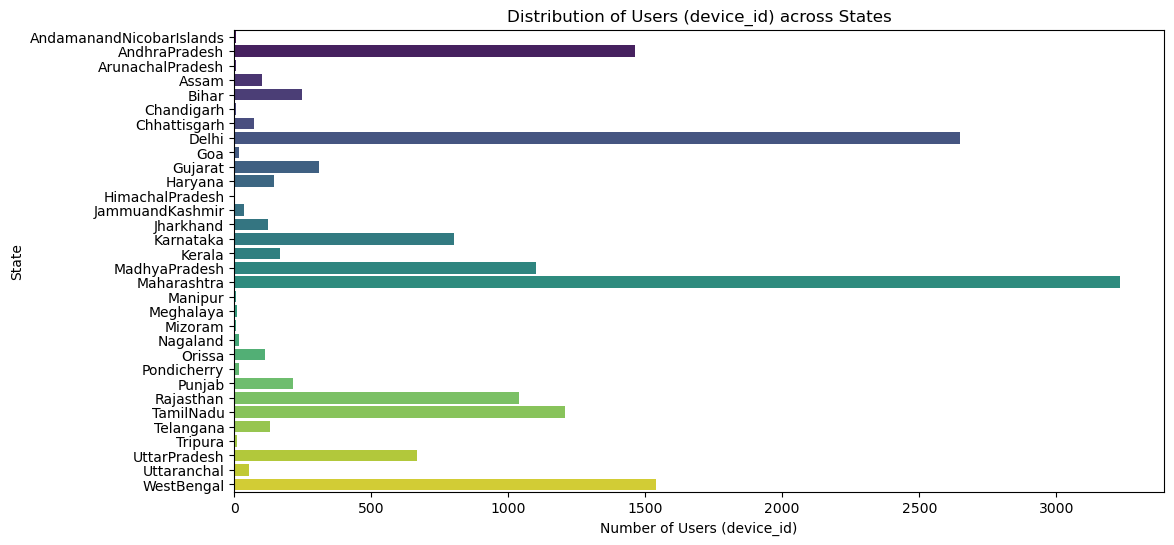

In [27]:
import seaborn as sns
df = pd.DataFrame(merged_data)

# Step 1: Count unique device_ids per state
user_distribution = df.groupby('state')['device_id'].nunique().reset_index()
user_distribution.columns = ['State', 'User Count']

# Step 2: Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='User Count', y='State', data=user_distribution, palette='viridis')
plt.title('Distribution of Users (device_id) across States')
plt.xlabel('Number of Users (device_id)')
plt.ylabel('State')
plt.show()

## Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).


Columns in DataFrame: Index(['event_id', 'device_id', 'timestamp', 'longitude', 'latitude', 'city',
       'state', 'gender', 'age', 'group', 'phone_brand', 'device_model'],
      dtype='object')


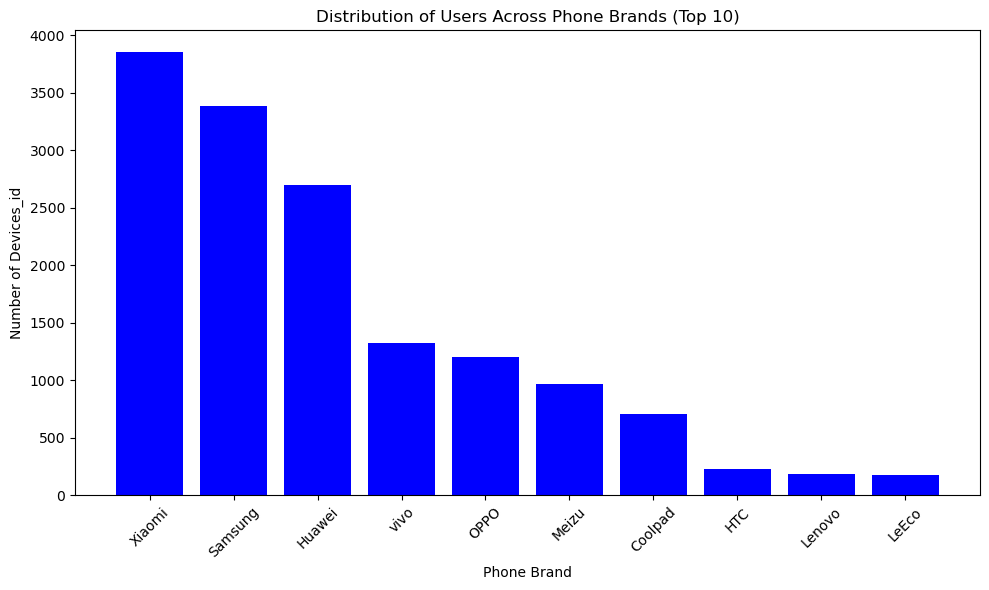

In [28]:
df = pd.DataFrame(merged_data)
# Check columns
print("Columns in DataFrame:", df.columns)

# Clean column names
df.columns = df.columns.str.strip()

# Count unique device IDs for each phone brand
brand_distribution = df.groupby('phone_brand')['device_id'].nunique().reset_index()

# Rename columns for clarity
brand_distribution.columns = ['phone_brand', 'device_id_count']

# Sort by unique device count and select the top 10 brands
top_brands = brand_distribution.sort_values(by='device_id_count', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_brands['phone_brand'], top_brands['device_id_count'], color='blue')
plt.xlabel('Phone Brand')
plt.ylabel('Number of Devices_id')
plt.title('Distribution of Users Across Phone Brands (Top 10)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Distribution of Users across Gender.

In [29]:

# Assuming your data is stored in a DataFrame called `df`
df = pd.DataFrame(merged_data)
# Group by gender and count unique device IDs (users)
gender_distribution = df.groupby('gender')['device_id'].nunique().reset_index()

# Rename the columns for clarity
gender_distribution.columns = ['gender', 'device_id_count']

# Display the result
print(gender_distribution)

  gender  device_id_count
0      F             5722
1      M             9799


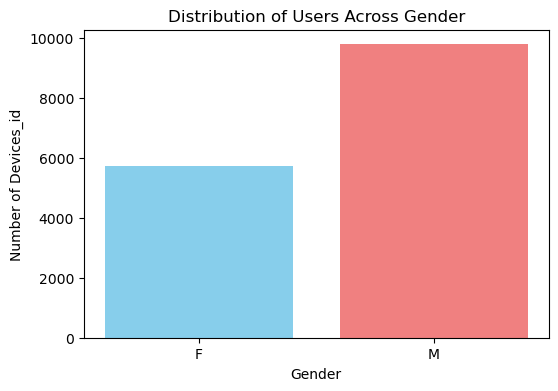

In [30]:
# Plotting the gender distribution
plt.figure(figsize=(6, 4))
plt.bar(gender_distribution['gender'], gender_distribution['device_id_count'], color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Number of Devices_id')
plt.title('Distribution of Users Across Gender')
plt.show()

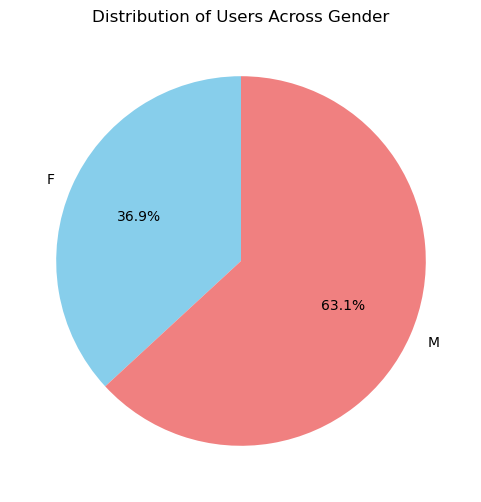

In [32]:
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution['device_id_count'], labels=gender_distribution['gender'], 
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Users Across Gender')
plt.show()

##  Distribution of Users across Age Segments.

In [33]:
# Assuming your data is stored in a DataFrame called `df`

df = pd.DataFrame(merged_data)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
# Define age segments (bins)
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Adjust the bins as needed
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Create a new column for age segments
df['age_segment'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age segments and count unique device IDs (users)
age_segment_distribution = df.groupby('age_segment')['device_id'].nunique().reset_index()

# Rename columns for clarity
age_segment_distribution.columns = ['age_segment', 'unique_device_count']

# Display the result
print(age_segment_distribution)

  age_segment  unique_device_count
0        0-18                  123
1       19-25                 3568
2       26-35                 7250
3       36-45                 2714
4       46-55                 1248
5       56-65                  440
6         66+                  178


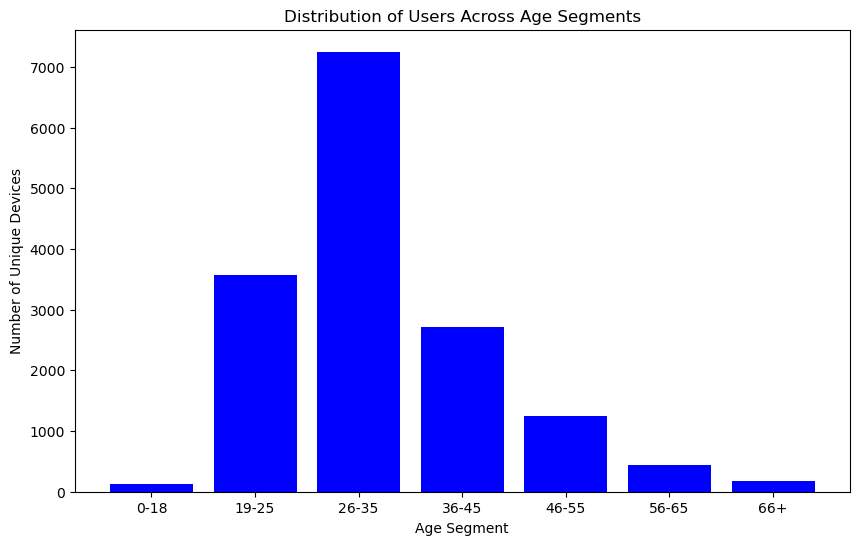

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(age_segment_distribution['age_segment'], age_segment_distribution['unique_device_count'], color='blue')
plt.xlabel('Age Segment')
plt.ylabel('Number of Unique Devices')
plt.title('Distribution of Users Across Age Segments')
plt.show()

#  Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

In [35]:
df = pd.DataFrame(merged_data)

df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert age to numeric, NaN for invalid values
df_clean = df.dropna(subset=['age', 'phone_brand', 'state', 'gender'])  # Clean data by dropping NaN values

# Step 2: Define age segments (bins)
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Adjust the bins as needed
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Step 3: Create a new column for age segments
df_clean['age_segment'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Step 4: Find the top 10 most used phone brands
top_10_brands = df_clean['phone_brand'].value_counts().nlargest(10).index

# Step 5: Filter the dataset to include only the top 10 phone brands
df_top_brands = df_clean[df_clean['phone_brand'].isin(top_10_brands)]

# Step 6: Group by age segment, state, gender, and phone brand
distribution = df_top_brands.groupby(['age_segment', 'state', 'gender', 'phone_brand']).size().reset_index(name='count')

# Step 7: Pivot the data for easier analysis (optional)
pivot_distribution = distribution.pivot_table(index=['age_segment', 'state', 'gender'],
                                              columns='phone_brand', values='count', fill_value=0)

# Display the results
print(distribution)
print(pivot_distribution)

     age_segment                     state gender phone_brand  count
0           0-18  AndamanandNicobarIslands      F     Coolpad      0
1           0-18  AndamanandNicobarIslands      F         HTC      0
2           0-18  AndamanandNicobarIslands      F      Huawei      0
3           0-18  AndamanandNicobarIslands      F       LeEco      0
4           0-18  AndamanandNicobarIslands      F      Lenovo      0
...          ...                       ...    ...         ...    ...
4475         66+                WestBengal      M       Meizu     92
4476         66+                WestBengal      M        OPPO      0
4477         66+                WestBengal      M     Samsung      0
4478         66+                WestBengal      M      Xiaomi    189
4479         66+                WestBengal      M        vivo      0

[4480 rows x 5 columns]
phone_brand                                  Coolpad    HTC  Huawei  LeEco  \
age_segment state                    gender                          

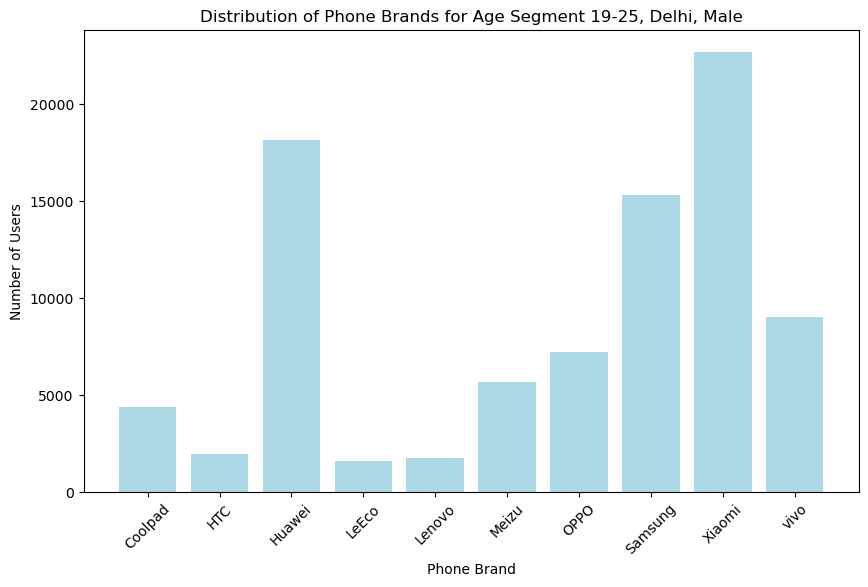

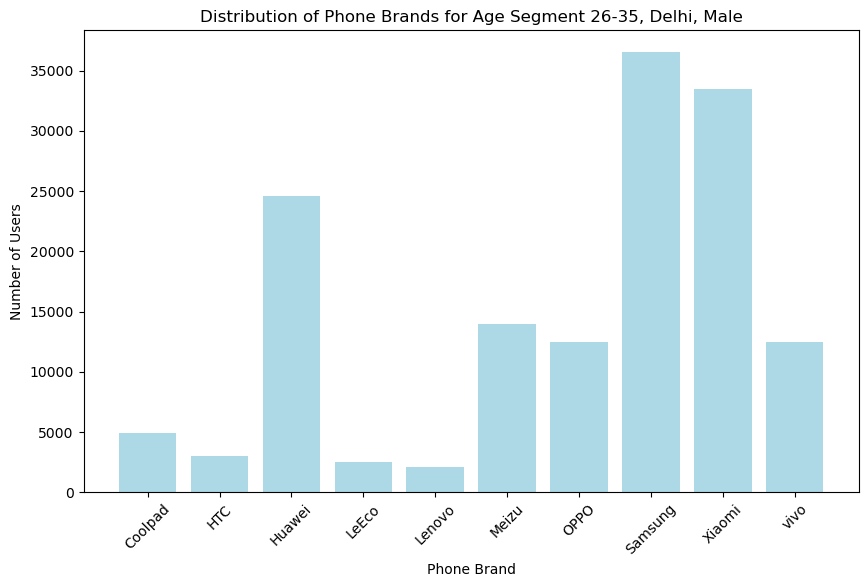

In [36]:


# Filter for a specific age segment, state, and gender

segment_data = distribution[(distribution['age_segment'] == '19-25') & (distribution['state'] == 'Delhi') & (distribution['gender'] == 'M')]
# Plotting the distribution of phone brands
plt.figure(figsize=(10, 6))
plt.bar(segment_data['phone_brand'], segment_data['count'], color='lightblue')
plt.xlabel('Phone Brand')
plt.ylabel('Number of Users')
plt.title('Distribution of Phone Brands for Age Segment 19-25, Delhi, Male')
plt.xticks(rotation=45)
plt.show()


segment_data = distribution[(distribution['age_segment'] == '26-35') & (distribution['state'] == 'Delhi') & (distribution['gender'] == 'M')]
# Plotting the distribution of phone brands
plt.figure(figsize=(10, 6))
plt.bar(segment_data['phone_brand'], segment_data['count'], color='lightblue')
plt.xlabel('Phone Brand')
plt.ylabel('Number of Users')
plt.title('Distribution of Phone Brands for Age Segment 26-35, Delhi, Male')
plt.xticks(rotation=45)
plt.show()


# Distribution of Gender for each State, Age Segment, and Phone Brand(Consider only 10 Most Used Phone Brands).

In [37]:

df = pd.DataFrame(merged_data)
# Step 1: Convert 'age' to numeric and clean the data
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert age to numeric, NaN for invalid values
df_clean = df.dropna(subset=['age', 'phone_brand', 'state', 'gender'])  # Clean data by dropping NaN values

# Step 2: Define age segments (bins)
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Adjust the bins as needed
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Step 3: Create a new column for age segments
df_clean['age_segment'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Step 4: Find the top 10 most used phone brands
top_10_brands = df_clean['phone_brand'].value_counts().nlargest(10).index

# Step 5: Filter the dataset to include only the top 10 phone brands
df_top_brands = df_clean[df_clean['phone_brand'].isin(top_10_brands)]

# Step 6: Group by state, age segment, phone brand, and gender
gender_distribution = df_top_brands.groupby(['state', 'age_segment', 'phone_brand', 'gender']).size().reset_index(name='count')

# Step 7: Pivot the data for easier analysis (optional)
pivot_gender_distribution = gender_distribution.pivot_table(index=['state', 'age_segment', 'phone_brand'],
                                                            columns='gender', values='count', fill_value=0)

# Display the results
print(gender_distribution)
print(pivot_gender_distribution)

                         state age_segment phone_brand gender  count
0     AndamanandNicobarIslands        0-18     Coolpad      F      0
1     AndamanandNicobarIslands        0-18     Coolpad      M      0
2     AndamanandNicobarIslands        0-18         HTC      F      0
3     AndamanandNicobarIslands        0-18         HTC      M      0
4     AndamanandNicobarIslands        0-18      Huawei      F      0
...                        ...         ...         ...    ...    ...
4475                WestBengal         66+     Samsung      M      0
4476                WestBengal         66+      Xiaomi      F      0
4477                WestBengal         66+      Xiaomi      M    189
4478                WestBengal         66+        vivo      F      0
4479                WestBengal         66+        vivo      M      0

[4480 rows x 5 columns]
gender                                                F      M
state                    age_segment phone_brand              
AndamanandNicobarIsla

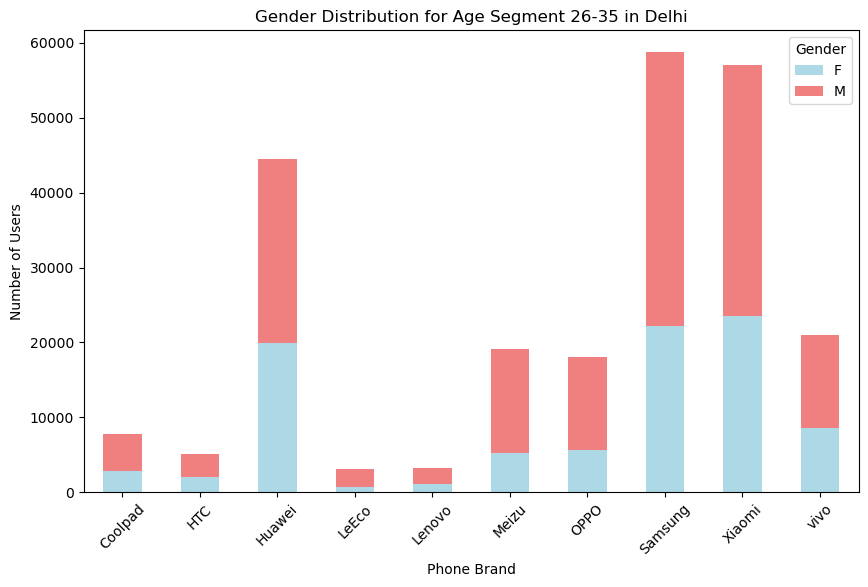

In [38]:
# Example for visualizing the gender distribution for a specific age segment and state
segment_data = gender_distribution[(gender_distribution['age_segment'] == '26-35') & (gender_distribution['state'] == 'Delhi')]

# Pivot the data for plotting
plot_data = segment_data.pivot(index='phone_brand', columns='gender', values='count').fillna(0)

# Plotting the stacked bar chart
plot_data.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(10, 6))
plt.xlabel('Phone Brand')
plt.ylabel('Number of Users')
plt.title('Gender Distribution for Age Segment 26-35 in Delhi')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Distribution of Age Segments for each State, Gender, and Phone Brand(Consider only 10 Most Used Phone Brands).

In [39]:

df = pd.DataFrame(merged_data)

# Step 1: Clean the data by dropping NaN values in relevant columns
df_clean = df.dropna(subset=['age', 'phone_brand', 'state', 'gender'])  # Clean data

# Step 2: Define age segments (bins)
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Adjust the bins as needed
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Step 3: Create a new column for age segments
df_clean['age_segment'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Step 4: Find the top 10 most used phone brands
top_10_brands = df_clean['phone_brand'].value_counts().nlargest(10).index

# Step 5: Filter the dataset to include only the top 10 phone brands
df_top_brands = df_clean[df_clean['phone_brand'].isin(top_10_brands)]

# Step 6: Group by state, gender, phone brand, and age segment
age_segment_distribution = df_top_brands.groupby(['state', 'gender', 'phone_brand', 'age_segment']).size().reset_index(name='count')

# Step 7: Pivot the data for easier analysis (optional)
pivot_age_segment_distribution = age_segment_distribution.pivot_table(index=['state', 'gender', 'phone_brand'],
                                                                      columns='age_segment', values='count', fill_value=0)

# Display the results
print(age_segment_distribution)
print(pivot_age_segment_distribution)

                         state gender phone_brand age_segment  count
0     AndamanandNicobarIslands      F     Coolpad        0-18      0
1     AndamanandNicobarIslands      F     Coolpad       19-25      0
2     AndamanandNicobarIslands      F     Coolpad       26-35      0
3     AndamanandNicobarIslands      F     Coolpad       36-45      0
4     AndamanandNicobarIslands      F     Coolpad       46-55      0
...                        ...    ...         ...         ...    ...
4475                WestBengal      M        vivo       26-35   3162
4476                WestBengal      M        vivo       36-45    783
4477                WestBengal      M        vivo       46-55    315
4478                WestBengal      M        vivo       56-65    124
4479                WestBengal      M        vivo         66+      0

[4480 rows x 5 columns]
age_segment                                   0-18   19-25   26-35   36-45  \
state                    gender phone_brand                          

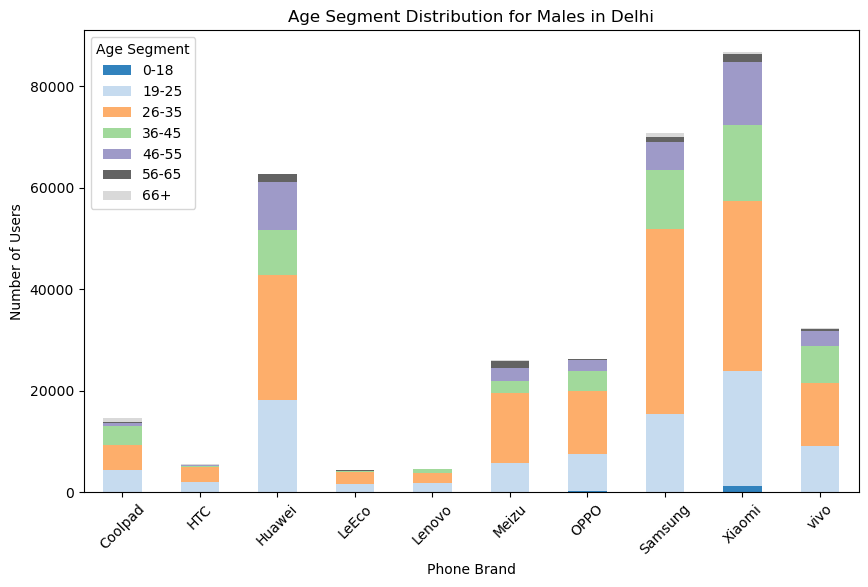

In [40]:
# Example for visualizing age segment distribution for a specific gender and state
state_gender_data = age_segment_distribution[(age_segment_distribution['state'] == 'Delhi') & 
                                             (age_segment_distribution['gender'] == 'M')]

# Pivot the data for plotting
plot_data = state_gender_data.pivot(index='phone_brand', columns='age_segment', values='count').fillna(0)

# Plotting the stacked bar chart
plot_data.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(10, 6))
plt.xlabel('Phone Brand')
plt.ylabel('Number of Users')
plt.title('Age Segment Distribution for Males in Delhi')
plt.xticks(rotation=45)
plt.legend(title='Age Segment')
plt.show()

## Hourly distribution of Phone Calls.

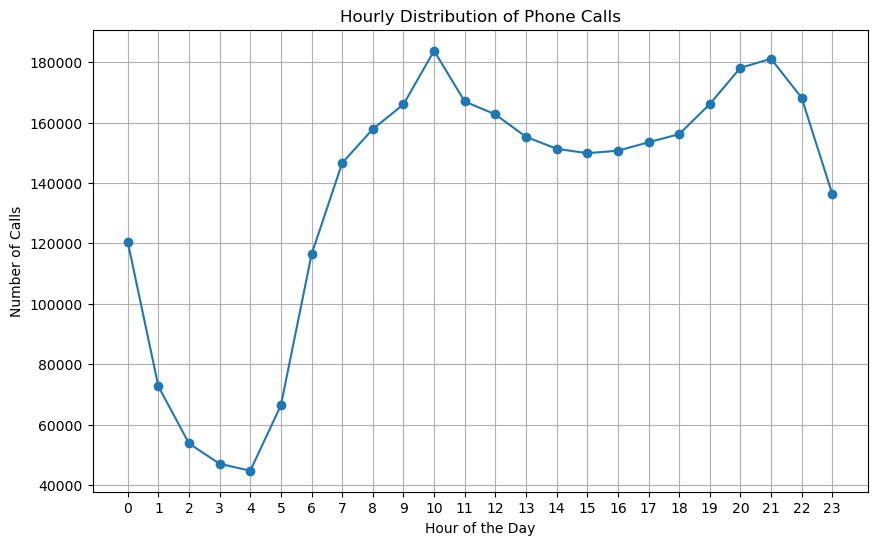

In [41]:
# Load the data into a DataFrame
df = pd.DataFrame(data)

# Step 1: Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 2: Extract the hour from the timestamp
df['hour'] = df['timestamp'].dt.hour

# Step 3: Group by hour and count the number of events
hourly_distribution = df.groupby('hour')['event_id'].count().reset_index()
hourly_distribution.columns = ['hour', 'call_count']

# Step 4: Plot the hourly distribution of phone calls
plt.figure(figsize=(10, 6))
plt.plot(hourly_distribution['hour'], hourly_distribution['call_count'], marker='o')
plt.title('Hourly Distribution of Phone Calls')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.xticks(range(24))  # Show all 24 hours on the x-axis
plt.grid()
plt.show()

##  Plot the Users on the Map using any suitable package.

In [42]:
!pip install folium

In [ ]:
import folium
import pandas as pd


# Load the data into a DataFrame
df = pd.DataFrame(merged_data)

# Step 1: Initialize a map
map_users = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Step 2: Add markers to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Event ID: {row['event_id']}<br>Device ID: {row['device_id']}<br>City: {row['city']}<br>State: {row['state']}<br>Gender: {row['gender']}",
        icon=folium.Icon(color='blue' if row['gender'] == 'M' else 'pink')
    ).add_to(map_users)

# Step 3: Save the map to an HTML file
map_users.save('users_map.html')

# Display the map (if using Jupyter Notebook)
map_users